<a href="https://colab.research.google.com/github/saadshaikh0158/saadan-anwar-shaikh-fear_greed_index.csv-/blob/main/Online_Payment_Fraud_Detection_using_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import numpy as np

In [7]:
%matplotlib inline

In [12]:
data = pd.read_csv(r"/content/new_data.csv")
data.head
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
obj = (data.type == "object")
object_cols = list(obj[obj].index)

int_ = (data.type == "int")
num_cols = list(int_[int_].index)
print("integer variables:" ,len(num_cols))

f1 = (data.type == "float")
f1_cols = list(f1[f1].index)
print("float variable:" , len(f1_cols))



integer variables: 0
float variable: 0


<Axes: xlabel='type', ylabel='count'>

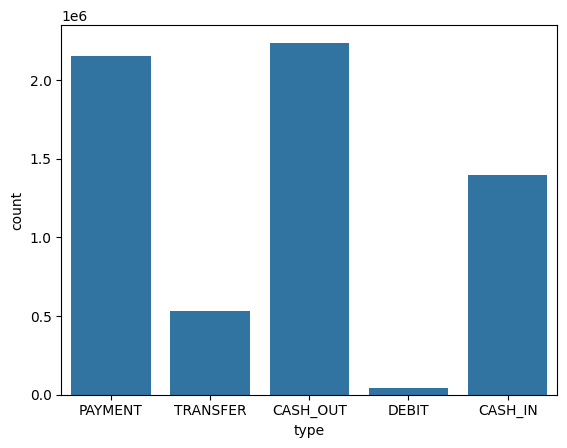

In [18]:
sns.countplot(x="type" ,data=data)

<Axes: xlabel='type', ylabel='amount'>

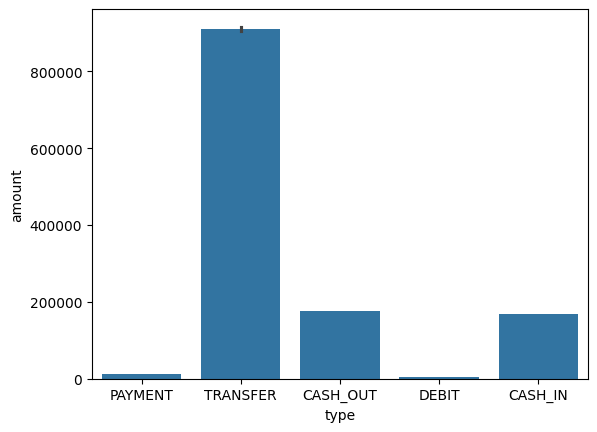

In [19]:
sns.barplot(x="type" , y="amount" , data=data)


In [20]:
data["isFraud"].value_counts()

,count
isFraud,
0,6354407
1,8213


/tmp/ipython-input-3385759971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["step"], bins=50)


<Axes: xlabel='step', ylabel='Density'>

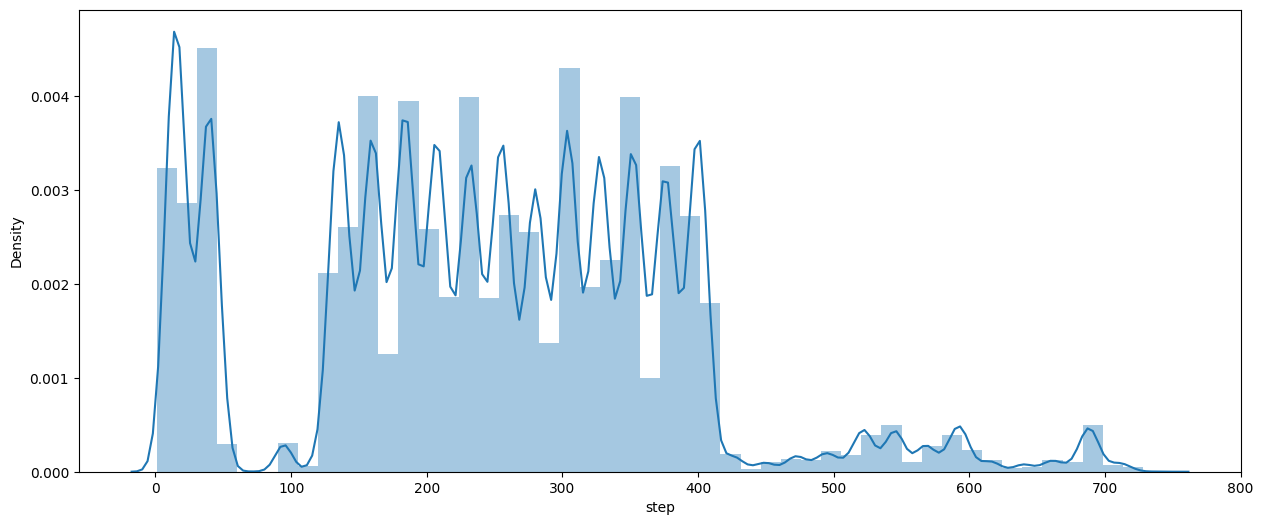

In [21]:
plt.figure(figsize=(15,6))
sns.distplot(data["step"], bins=50)

<Axes: >

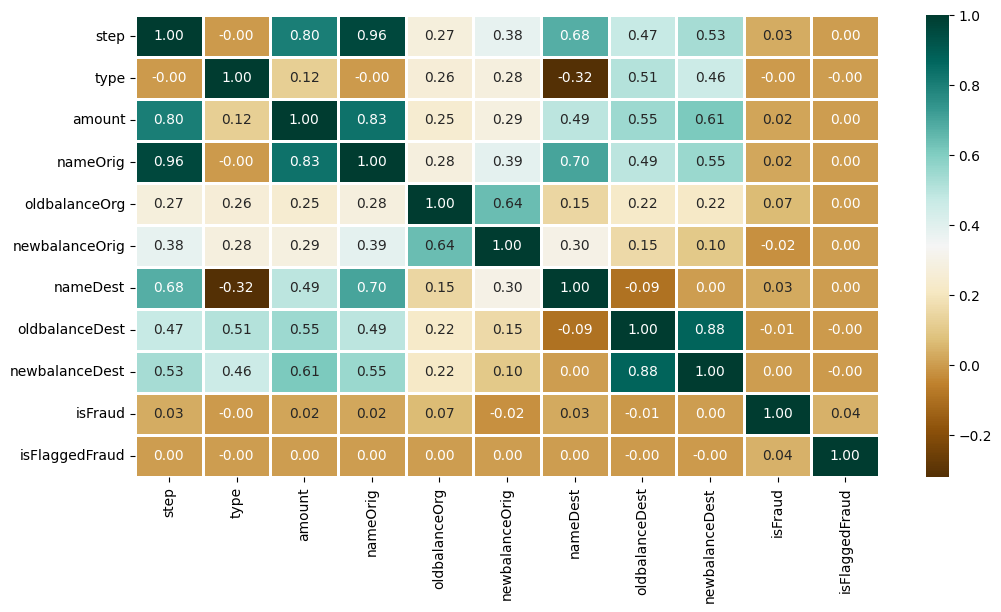

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(),
cmap="BrBG" ,
fmt=".2f" ,
linewidths=2 ,
annot=True)


In [24]:
type_new = pd.get_dummies(data["type"], drop_first=True)
data_new = pd.concat([data , type_new], axis=1)
data_new

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,True,False,False,False
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,True,False,False,False
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,True


In [25]:
x = data_new.drop(["isFraud" , "type" , "nameOrig" , "nameDest"], axis=1)
y= data_new["isFraud"]

In [26]:
x.shape , y.shape

((6362620, 11), (6362620,))

In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [30]:
models = [LogisticRegression() , XGBClassifier() , RandomForestClassifier(n_estimators=7 , criterion="entropy" , random_state=7)]

for i in range(len(models)):
    models[i].fit(x_train , y_train)
    print(f"{models[i]} : ")

    train_pred = models[i].predict_proba(x_train)[:, 1]
    print("Training Accuracy:" , ras(y_train , train_pred))

    y_preds = models[i].predict_proba(x_test)[: , 1]
    print("validation Accuracy: " , ras(y_test , y_preds))
    print()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy: 0.9631863370371965
validation Accuracy:  0.9633614495065896

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy: 0.7078356072170395
validation Accuracy:  0.7124525368938691

RandomForestClassifier(criterion='entropy', n_estima

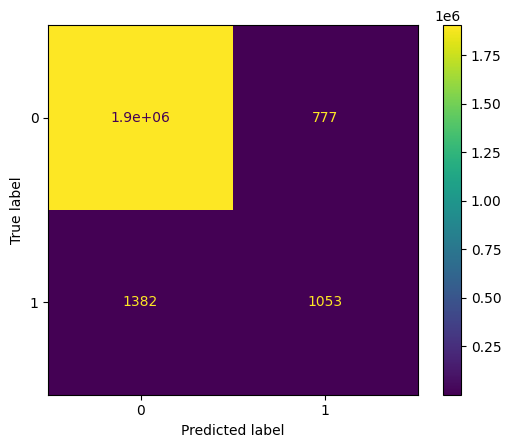

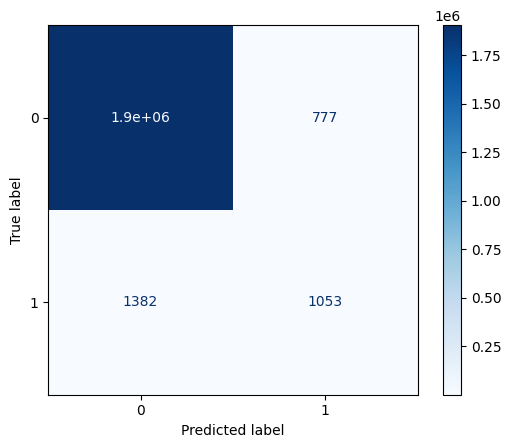

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.from_estimator(models[1] , x_test , y_test)

cm.plot(cmap = "Blues")

plt.show()

# Task
Replace `data.types` with `data.dtypes` in the cell `n1rf4xIOrI7F`.

## Correct the AttributeError

### Subtask:
Replace `data.types` with `data.dtypes` in the selected cell to correctly access the data types of the DataFrame columns.


## Summary:

### Data Analysis Key Findings
*   This step involved a code correction to resolve an `AttributeError` and did not yield any specific data analysis findings.

### Insights or Next Steps
*   Always use the correct attribute or method name (e.g., `dtypes` for DataFrame column types) to prevent `AttributeError` and ensure code execution.
